<span id="#toc" style='font-size: 20pt; font-weight: bold'>TABLE OF CONTENTS</span>

<span style='font-size: 15pt; text-decoration: none; display: block;'>
  <a href="#slidebar" style="font-size: 15pt; text-decoration: none;">
    Slide Bar 
  </a>
</span>

<span id='import-lib' style='color:#008000; font-size:20pt; font-weight:bold'>Import Libraries</span>

In [1]:
import pyvista as pv
import numpy as np
from collections import deque
import math
import copy

<span id='load-data' style='color:#008000; font-size:20pt; font-weight:bold'>Load Data </span>

In [11]:
brick_part01 = pv.read('../CG_dataset/brick_part03.obj')

2025-06-14 21:36:07.107 (  24.042s) [    73D21AB5E5C0]       vtkOBJReader.cxx:216   WARN| vtkOBJReader (0x424c7350): unexpected data at end of line in OBJ file L.5
2025-06-14 21:36:07.107 (  24.042s) [    73D21AB5E5C0]       vtkOBJReader.cxx:216   WARN| vtkOBJReader (0x424c7350): unexpected data at end of line in OBJ file L.7
2025-06-14 21:36:07.107 (  24.042s) [    73D21AB5E5C0]       vtkOBJReader.cxx:216   WARN| vtkOBJReader (0x424c7350): unexpected data at end of line in OBJ file L.9
2025-06-14 21:36:07.107 (  24.042s) [    73D21AB5E5C0]       vtkOBJReader.cxx:216   WARN| vtkOBJReader (0x424c7350): unexpected data at end of line in OBJ file L.11
2025-06-14 21:36:07.107 (  24.042s) [    73D21AB5E5C0]       vtkOBJReader.cxx:216   WARN| vtkOBJReader (0x424c7350): unexpected data at end of line in OBJ file L.13
2025-06-14 21:36:07.107 (  24.042s) [    73D21AB5E5C0]       vtkOBJReader.cxx:216   WARN| vtkOBJReader (0x424c7350): unexpected data at end of line in OBJ file L.15
2025-06-14 21

In [12]:
# import open3d as o3d
# pcd = o3d.io.read_point_cloud("D:\\Learn_and_Study\\USTH\\Bachelor\\3D_Project\\CG_dataset\\brick_part01_smoothen.pcd")
# pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=30))

# # RECONSTRUCT SURFACE MESH BY POISSON AND CONVERT INTO PYVISTA
# mesh_o3d, _ = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8)
# mesh_o3d.compute_vertex_normals()

# vertices = np.asarray(mesh_o3d.vertices)
# triangles = np.asarray(mesh_o3d.triangles)
# faces = np.hstack([np.full((len(triangles), 1), 3), triangles]).flatten()  # Add face header

# mesh_pv = pv.PolyData(vertices, faces)

In [13]:
mesh = brick_part01
mesh

PolyData (0x73d1c52183a0)
  N Cells:    84400
  N Points:   42202
  N Strips:   0
  X Bounds:   -2.253e-01, 3.631e+00
  Y Bounds:   -1.155e+00, 1.941e+00
  Z Bounds:   -6.591e-01, 3.403e+00
  N Arrays:   2

<span style='color:#008000; font-size:20pt; font-weight:bold'>Curvature</span>

In [14]:
curvature = mesh.curvature(curv_type='mean')
# min_curv = np.fabs(mesh.curvature(curv_type='minimum'))
# max_curv = np.fabs(mesh.curvature(curv_type='maximum'))
# curv = np.maximum(min_curv, max_curv)
clim = [np.percentile(curvature, 3), np.percentile(curvature, 90)]

Total points: 42202
Min: -552.7091, Max: 216.5478, Mean: 0.8521


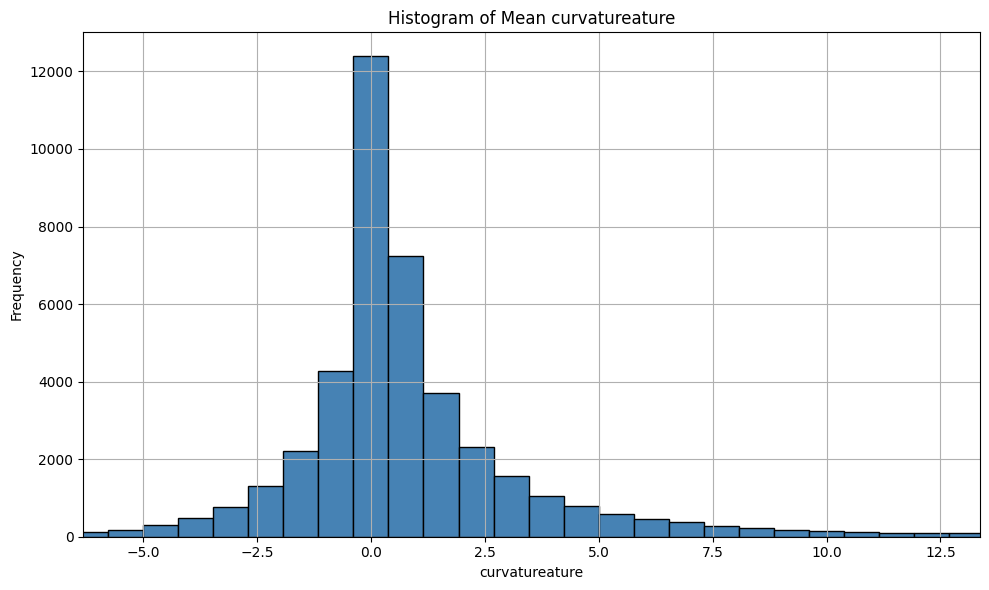

In [15]:
import matplotlib.pyplot as plt

print(f"Total points: {mesh.n_points}")
print(f"Min: {np.min(curvature):.4f}, Max: {np.max(curvature):.4f}, Mean: {np.mean(curvature):.4f}")

plt.figure(figsize=(10, 6))
plt.hist(curvature, bins=1000, color='steelblue', edgecolor='black')
plt.title(f"Histogram of Mean curvatureature")
plt.xlabel("curvatureature"), plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.xlim(np.percentile(curvature, 1), np.percentile(curvature, 99))
plt.show()

<span style='color:#008000; font-size:20pt; font-weight:bold'>Neighbors Propagation</span>

<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Mesh Simplification and Smoothing</span>

In [16]:
# import fast_simplification
# mesh = fast_simplification.simplify_mesh(brick_part01, target_reduction=0.5)
# mesh = mesh.smooth(n_iter=500)  

<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Functions</span>

In [17]:
# def significant_curvature_difference(curvature, point, n_rings, threshold=1.0):
#     neighbors_flat = list()
#     neighbors = mesh.point_neighbors_levels(point, n_rings)

#     for i, neighbor in enumerate(neighbors):
#         neighbors_flat.extend(neighbor)

#     if len(neighbors_flat) == 0:
#         raise Exception("The point has no neighbor")

#     avg_curvature = np.mean(curvature[list(neighbors_flat)])

#     # std_curvature = np.std(neighbor_curvatures)
#     # if abs(std_curvature - avg_curvature) > threshold * std_curvature:

#     return abs(curvature[point] - avg_curvature) >= threshold
    
# def local_max_curvature_point(curvature, founded_points: list|set):
#     if len(founded_points) == len(curvature): raise Exception("Has visited all points")
#     curvature_copy = copy.deepcopy(curvature)
#     for point in founded_points:
#         curvature_copy[point] = -(math.inf)
#     return np.argmax(curvature_copy)

# def propagate_with_curvature_threshold(curvature, propagated, start_point, threshold):
#     # threshold = np.percentile(mean_curvature, 90)
#     if curvature[start_point] < threshold:
#         raise Exception("Starting point does not satisfy curvature threshold")

#     visited = set()
#     queue = deque([start_point])  
#     result = set()

#     result.add(start_point)

#     while queue:

#         point = queue.popleft()
#         if point in visited:
#             continue
#         visited.add(point)

#         for neighbor in mesh.point_neighbors(point):
#             if neighbor not in visited and neighbor not in propagated:
#                 if curvature[neighbor] >= threshold:
#                     result.add(neighbor)
#                     queue.append(neighbor)
#     if result: 
#         propagated.update(result)
#         return result
#     else: raise Exception("Propagation result is empty")

# def local_max_curvature_point_on_edge(curvature, visited, max_points_on_edge:list):
#     while True:
#         max_point = local_max_curvature_point(curvature, visited)
#         if not significant_curvature_difference(curvature, max_point, n_rings=2, threshold=1.0):
#             max_points_on_edge.append(max_point)
#             visited.add(max_point)
#             break
#         visited.add(max_point)

#     print(f"Number of visited: {len(visited)}")
#     print(f"Number of max_points_on_edge: {len(max_points_on_edge)}")

# def scene_setting(plotter, edges: list|set=None, title: str=None, position: tuple=None):

#     def list_has_sublist_or_subset(lst):
#         return any(isinstance(e, list|set) for e in lst)
    
#     if position: plotter.subplot(*position)
#     if title: plotter.add_text(title)
#     if edges:
#         if list_has_sublist_or_subset(edges):
#             for i, edge in enumerate(edges):
#                 plotter.add_mesh(mesh.points[(list(edge))], color=colors[i], point_size=10, render_points_as_spheres=True)    
#         else: 
#             plotter.add_mesh(mesh.points[(list(edges))], color=colors[0], point_size=10, render_points_as_spheres=True)    
             
#     plotter.add_mesh(mesh.points[max_points_on_edge], color='white', point_size=12, render_points_as_spheres=True)
#     plotter.add_mesh(mesh, show_edges=True, scalars=curvature, clim=clim)

# # def screenshot():
#     # import os
#     # plotter = pv.Plotter(off_screen=True)
#     # scene_setting(plotter)

#     # for name, view in camera_views.items():
#     #     plotter.camera_position = view
#     #     plotter.screenshot(os.path.join(save_dir, f"result_{name}.png"))
#     # plotter.close()

# def erose_condition(edge, point, condition: str, n_rings=1):
#     neighbors = mesh.point_neighbors_levels(point, n_levels=n_rings)
#     neighbors = set().union(*neighbors)

#     def most(iterable):
#         lst = list(iterable)
#         return sum(bool(x) for x in lst) > len(lst) // 2

#     if condition == "most":
#         return most(neighbor in edge for neighbor in neighbors)

#     if condition == "all":
#         return all(neighbor in edge for neighbor in neighbors)

# def erosion(edge, condition: str = "most", n_rings=1, iterations=1, single_line: bool=False):
#     '''
#     Input: List of points as edge
#     Output: List of points after removal
#     Algorithm: If all or most n_ring_neighbors of a point belong to edge -> Keep the point
#                Otherwise, remove the point
#     '''
#     edge_copy = set(copy.deepcopy(edge))

#     while iterations != 0:
#         removal_points = set()

#         for point in edge_copy:
#             if not erose_condition(edge_copy, point, condition=condition, n_rings=n_rings):
#                 removal_points.add(point)
        
#         edge_copy.difference_update(removal_points)
#         iterations -= 1
#     return edge_copy

<span style='color:#008000; font-size:20pt; font-weight:bold'>Rendering</span>

In [18]:
p = pv.Plotter()
p.add_mesh(mesh, scalars=curvature, clim=clim, show_edges=True)
p.show()

Widget(value='<iframe src="http://localhost:45101/index.html?ui=P_0x73d1c53b40e0_1&reconnect=auto" class="pyvi…

In [19]:
# all_point_ids = list(range(mesh.n_points))
# visited = set()
# max_points_on_edge = list()
# edge_vertices = list()

# iterations = 4
# thresholds = [2, 1.8, 1.5, 1]

# colors = ['red', 'dodgerblue', 'green', 'yellow', 'magenta', 'orangered', 'chocolate']

# # camera_views = {
# #         "xy_top": "xy",
# #         "xz_front": "xz",
# #         "yz_side": "yz",
# #         "iso_view": "iso",
# #         "corner_1": [-1, -1, 1],
# #         "corner_2": [1, 1, 1],
# #         "corner_3": [-1, 1, 1],
# #         "corner_4": [1, -1, 1],
# #         "bottom_up": [0, 0, -1],
# #     }

# # save_dir = "screenshots"

# for i in range(iterations):
#     local_max_curvature_point_on_edge(curvature, visited, max_points_on_edge)
#     edge = propagate_with_curvature_threshold(curvature, visited, max_points_on_edge[i], thresholds[i])
#     if edge:
#         edge_vertices.append(edge)
#         print(f"** Iteration {i}: {len(edge)} points | Max Curvature: {curvature[max_points_on_edge[i]]:.4f} | Average Curvature: {np.mean(curvature[list(edge)]):.4f}")
#     else:
#         print(f"** Iteration {i}: No points propagated — threshold = {thresholds[i]:.2f}")

# erosed_edges_all = list()
# erosed_edges_most = list()


# for edge in edge_vertices:
#     erosed = erosion(edge, condition="all")
#     erosed_edges_all.append(erosed)

# for edge in edge_vertices:
#     erosed = erosion(edge, condition="most")
#     erosed_edges_most.append(erosed)

# plotter = pv.Plotter(shape=(2, 2))

# scene_setting(plotter, title="Mesh", position=(0, 0))
# scene_setting(plotter, erosed_edges_all, title="Edges", position=(0, 1))
# scene_setting(plotter, erosed_edges_all, title="Erode: 'all' 1 time", position=(1, 0))
# scene_setting(plotter, erosed_edges_most, title="Erode: 'most' 1 time", position=(1, 1))

# plotter.show(cpos='xy')